# Number Summaries

Computing statistics of some sort is an integral part of every data analytic process. Yet, it is important be aware of the fact that every summary may lead to the loss of important information as if the used method is not able to capture all relevant properties - even when clearly visible to the eye.

### Anscombe's Quartet

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) is a famous example comprising four data sets with nearly identical descriptive statistics but nevertheless very different appearance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

When computing mean and std for the datasets, they appear to be very similar.

In [3]:
df.groupby('dataset').agg(['mean', 'std'])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

Yet, when plotting them, the difference becomes apparent.

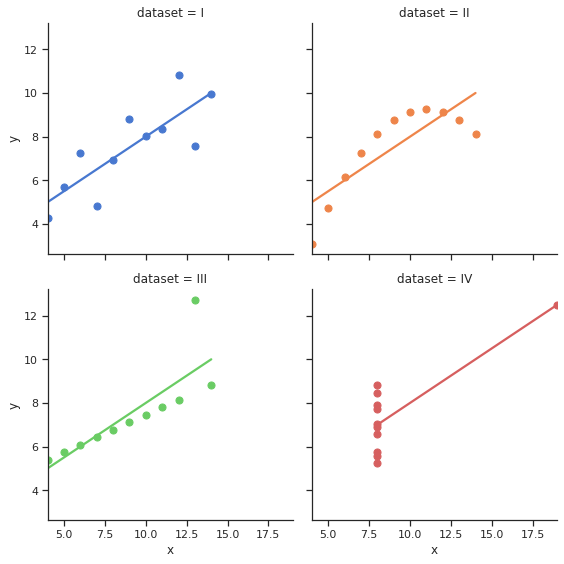

In [4]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

Dataset III and IV clearly show the effect of outliers on non-robust statistical estimates.

For sake of completeness, let's compute robust statistics like median and MAD.

In [5]:
def mad(x):
    return np.median(np.abs(x - np.median(x)))


df.groupby('dataset').agg([np.median, mad])

x           y      
        median  mad median   mad
dataset                         
I          9.0  3.0   7.58  1.23
II         9.0  3.0   8.14  0.99
III        9.0  3.0   7.11  1.03
IV         8.0  0.0   7.04  1.28

ModuleNotFoundError: No module named 'statsmodels'

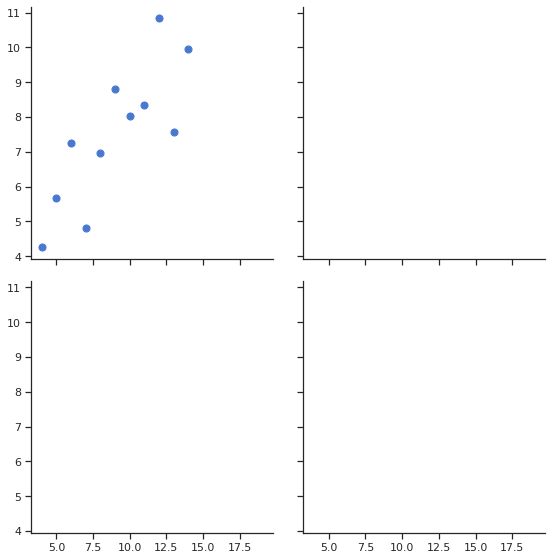

In [6]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1},
           robust=True)  # <-- helps dealing with the leverage point in III

### Datasaurus

A more recent example is the [Datasaurus Dozen](https://itsalocke.com/datasaurus/) (see the link for the underlying paper) dataset.

Observe how the summary statistics does merely change whereas the distributions are obviously dramatically different.

![Datasaurus Dozen](https://github.com/stephlocke/lazyCDN/blob/master/DinoSequential.gif?raw=true)